In [14]:
import threading
import time
from rich.console import Console
from rich.logging import RichHandler
import logging
import websocket

import requests
import websocket
import json
import time
import os
from dotenv import load_dotenv
from urllib.parse import urlencode
import hmac
import hashlib
import copy

In [2]:
real_time_prices = []

def run_websocket():
    global real_time_prices
    def on_message(ws, message):
        global real_time_prices
        message_ = json.loads(message)
        real_time_prices.append({"t": message_['T'], "p":message_['p']})


    ws = websocket.WebSocketApp("wss://fstream.binance.com/ws/1000pepeusdc@aggTrade", on_message=on_message)

    ws.run_forever()


In [3]:
websocket_thread = threading.Thread(target=run_websocket)
websocket_thread.start()


In [30]:
import pickle
with open('real_time_prices.back.pkl', 'rb') as f:
    prices = pickle.load(f)
    prices = prices[1:10000]

In [31]:
len(prices)

9999

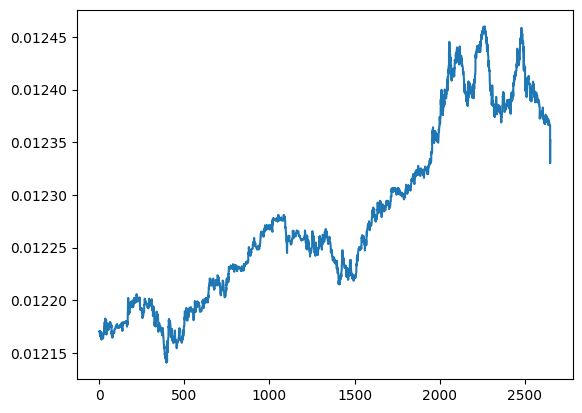

In [17]:
from matplotlib import pyplot as plt
import numpy as np
plt.plot([(float(x['t']) - float(prices[0]['t']))* 10**(-3) for x in prices], [float(x['p']) for x in prices])

In [21]:
prices_list = [float(x['p']) for x in prices]
time_list= [(float(x['t']) - float(prices[0]['t']))* 10**(-3) for x in prices]


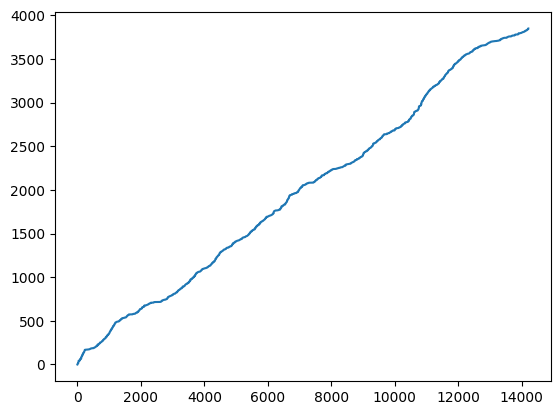

In [22]:
plt.plot(time_list)

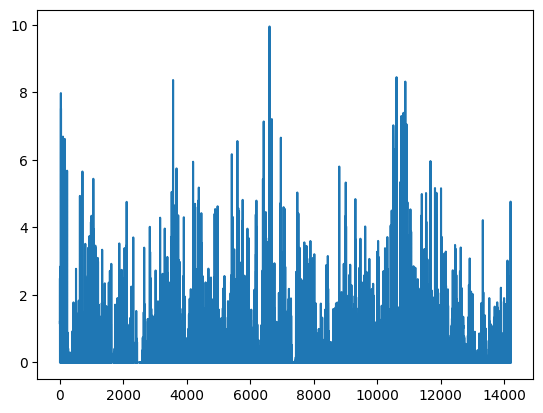

In [23]:
plt.plot([(time_list[i] - time_list[i - 1]) for i in range(1, len(time_list))])

In [24]:
[num for num in  [(time_list[i] - time_list[i - 1]) for i in range(1, len(time_list))]]

[1.202,
 1.137,
 2.491,
 0.0,
 0.0,
 0.0,
 0.0,
 2.234,
 1.0549999999999997,
 0.3930000000000007,
 0.9759999999999991,
 1.0690000000000008,
 1.061,
 0.28699999999999903,
 1.2800000000000011,
 0.0019999999999988916,
 0.0600000000000005,
 0.0,
 0.0,
 0.0,
 0.0,
 0.057000000000000384,
 0.0,
 0.0,
 0.0,
 0.08000000000000007,
 2.8530000000000015,
 0.8559999999999981,
 0.004000000000001336,
 0.36999999999999744,
 3.014000000000003,
 7.974,
 0.25900000000000034,
 2.7129999999999974,
 2.335000000000001,
 7.518999999999998,
 0.08800000000000097,
 2.1810000000000045,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0009999999999976694,
 0.0,
 0.0,
 0.0,
 0.0009999999999976694,
 0.0010000000000047748,
 0.0049999999999954525,
 0.021999999999998465,
 0.03100000000000591,
 0.0,
 0.01099999999999568,
 0.0,
 0.0,
 0.0,
 0.0,
 0.005000000000002558,
 0.0,
 0.0,
 0.06099999999999994,
 0.0,
 0.6400000000000006,
 0.0030000000000001137,
 0.012999999999998124,
 1.240000000000002,
 0.56400

(array([1.0074e+04, 7.5000e+02, 4.8100e+02, 3.9100e+02, 3.1600e+02,
        2.5600e+02, 2.2200e+02, 1.7600e+02, 1.8800e+02, 1.2500e+02,
        1.3400e+02, 1.1300e+02, 9.3000e+01, 8.5000e+01, 7.0000e+01,
        6.7000e+01, 7.4000e+01, 5.0000e+01, 4.7000e+01, 3.0000e+01,
        3.7000e+01, 3.3000e+01, 3.1000e+01, 2.8000e+01, 2.2000e+01,
        2.9000e+01, 1.6000e+01, 2.3000e+01, 1.8000e+01, 1.7000e+01,
        2.0000e+01, 1.1000e+01, 1.4000e+01, 1.1000e+01, 1.4000e+01,
        8.0000e+00, 8.0000e+00, 8.0000e+00, 2.0000e+00, 5.0000e+00,
        6.0000e+00, 4.0000e+00, 8.0000e+00, 1.0000e+01, 7.0000e+00,
        9.0000e+00, 5.0000e+00, 6.0000e+00, 6.0000e+00, 1.0000e+00,
        6.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00, 3.0000e+00,
        0.0000e+00, 2.0000e+00, 4.0000e+00, 1.0000e+00, 2.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        2.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 1.0000e+00, 2.0000e+00, 1.00

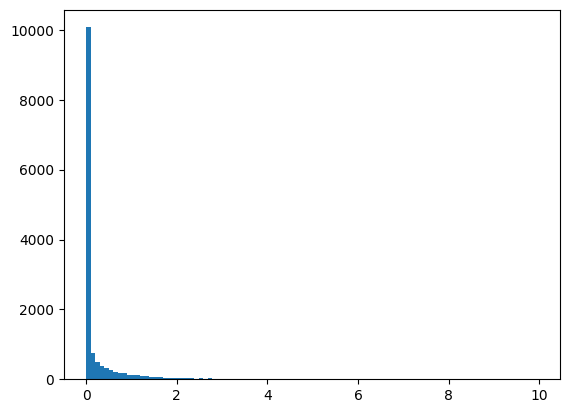

In [25]:

plt.hist(  [num for num in  [(time_list[i] - time_list[i - 1]) for i in range(1, len(time_list))]] , bins=100)


(array([1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 4.000e+00, 2.000e+00, 2.000e+00, 5.000e+00, 3.000e+00,
        1.000e+00, 3.000e+00, 2.000e+00, 3.000e+00, 6.000e+00, 1.000e+01,
        7.000e+00, 1.000e+01, 1.600e+01, 1.600e+01, 1.700e+01, 2.300e+01,
        1.300e+01, 3.200e+01, 2.000e+01, 2.800e+01, 3.700e+01, 4.000e+01,
        4.500e+01, 6.700e+01, 7.800e+01, 1.000e+02, 1.070e+02, 1.410e+02,
        1.510e+02, 1.900e+02, 3.150e+02, 3.630e+02, 4.450e+02, 6.810e+02,
        1.087e+03, 2.646e+03, 5.490e+02, 2.709e+03, 1.084e+03, 7.100e+02,
        4.890e+02, 4.130e+02, 3.740e+02, 1.850e+02, 1.840e+02, 1.420e+02,
        8.900e+01, 8.900e+01, 6.400e+01, 4.700e+01, 4.600e+01, 4.000e+01,
        4.000e+01, 4.000e+01, 3.100e+01, 2.200e+01, 1.300e+01, 2.400e+01,
        2.000e+01, 2.000e+01, 1.700e+01, 8.000e+00, 6.000e+00, 5.000e+00,
        5.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 2.000e+00,
        3.000e+00, 2.000e+00, 2.000e+0

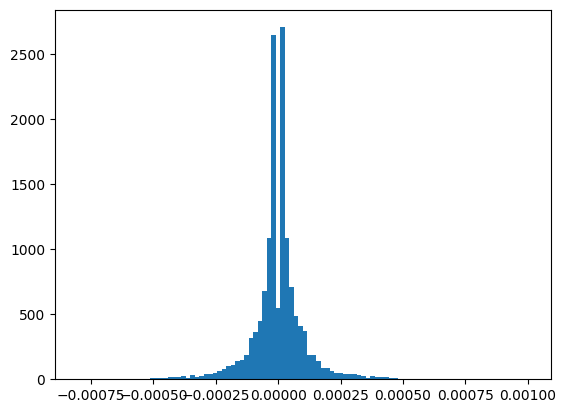

In [26]:
plt.hist([(prices_list[i] / prices_list[i - 1] - 1) for i in range(1, len(prices_list))], bins=100)

In [27]:
data = [[(float(x['t']) - float(prices[0]['t'])) * 10**(-3) , float(x['p'])]for x in prices]

In [28]:
# 计算价格变化达到2%所需的时间
result = []

# 遍历每个时间点
for i in range(len(data)):
    start_time, start_price = data[i]
    found = False
    
    # 遍历后续时间点
    for j in range(i + 1, len(data)):
        current_time, current_price = data[j]
        
        # 计算价格变化百分比
        price_change = (current_price - start_price) / start_price
        
        # 检查价格变化是否达到2%
        if abs(price_change) >= 0.0015:
            time_diff = current_time - start_time
            result.append([start_time, start_price, time_diff])
            found = True
            break
    
    # 如果在后续时间点中没有找到达到2%的变化
    if not found:
        result.append([start_time, start_price, None])


(array([495., 142., 315., 541., 618., 801., 652., 666., 655., 558., 538.,
        511., 416., 528., 473., 329., 291., 243., 234., 260., 261., 223.,
        253., 259., 226., 227., 240., 173., 222., 191., 161., 110., 160.,
        140., 140.,  97.,  84.,  88.,  81.,  78.,  67.,  90., 102.,  56.,
         51.,  38.,  98.,  62.,  90.,  86.,  48.,  47.,  52.,  36.,  28.,
         31.,  51.,  53.,  45.,  39.,  15.,   6.,  15.,  21.,  18.,  24.,
         29.,  11.,  24.,  15.,  14.,  60.,  14.,  16.,   9.,   7.,   8.,
          0.,   0.,   1.,  14.,   5.,   0.,   2.,   2.,   1.,   4.,   1.,
          3.,   0.,  10.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          5.]),
 array([ -1.     ,   0.75715,   2.5143 ,   4.27145,   6.0286 ,   7.78575,
          9.5429 ,  11.30005,  13.0572 ,  14.81435,  16.5715 ,  18.32865,
         20.0858 ,  21.84295,  23.6001 ,  25.35725,  27.1144 ,  28.87155,
         30.6287 ,  32.38585,  34.143  ,  35.90015,  37.6573 ,  39.41445,
         41.1716 ,  42

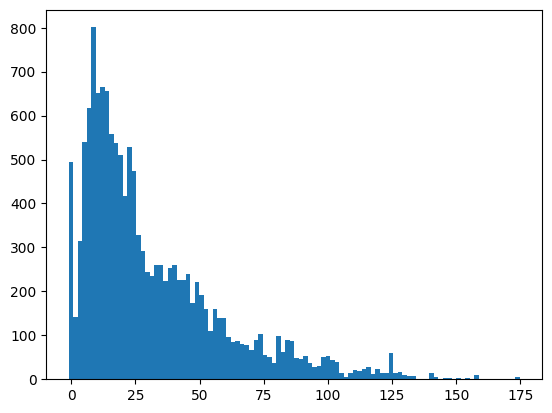

In [29]:
plt.hist([-1 if x is None else x for x in np.array(result)[:,-1]], bins=100)

In [30]:
price_list = prices_list

In [31]:
result = []


# 遍历每个价格
for i in range(len(prices)):
    start_time = float(prices[i]['t'])
    start_price = float(prices[i]['p'])
    trend_up = None
    step_count = 0
    total_percentage_change = 0
    duration = 0  # 初始化持续时间
    
    # 遍历后续价格
    for j in range(i + 1, len(prices)):
        current_time = float(prices[j]['t'])
        current_price = float(prices[j]['p'])
        percentage_change = (current_price - start_price) / start_price
        
        # 如果趋势未定义，定义初始趋势
        if trend_up is None:
            trend_up = percentage_change > 0
        
        # 检查趋势是否反转
        if (percentage_change > 0 and trend_up) or (percentage_change < 0 and not trend_up):
            step_count += 1
            duration = current_time - start_time  # 计算持续时间
            total_percentage_change = (current_price - start_price) / start_price
        else:
            break
    
    result.append([start_time, start_price, step_count, duration * 10**(-3), total_percentage_change])


In [32]:
np.mean(np.array(result)[:, -1])

2.742579482618312e-05

(array([2.0000e+00, 4.0000e+00, 4.0000e+00, 3.0000e+00, 4.0000e+00,
        1.0000e+00, 7.0000e+00, 4.0000e+00, 5.0000e+00, 6.0000e+00,
        7.0000e+00, 4.0000e+00, 1.0000e+01, 4.0000e+00, 3.0000e+00,
        1.1000e+01, 3.0000e+00, 1.0000e+00, 4.0000e+00, 1.0000e+00,
        5.0000e+00, 5.0000e+00, 1.0000e+00, 6.0000e+00, 1.0000e+00,
        6.0000e+00, 1.0000e+00, 3.0000e+00, 8.0000e+00, 2.0000e+00,
        4.0000e+00, 6.0000e+00, 1.0000e+00, 5.0000e+00, 3.0000e+00,
        3.0000e+00, 2.0000e+00, 6.0000e+00, 1.1000e+01, 7.2000e+01,
        1.3770e+03, 1.1097e+04, 1.2320e+03, 9.4000e+01, 7.0000e+00,
        3.0000e+00, 4.0000e+00, 1.0000e+00, 5.0000e+00, 5.0000e+00,
        1.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 2.0000e+00, 3.0000e+00, 4.0000e+00, 4.0000e+00,
        5.0000e+00, 5.0000e+00, 1.0000e+00, 5.0000e+00, 1.0000e+00,
        3.0000e+00, 6.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00,
        4.0000e+00, 4.0000e+00, 4.0000e+00, 5.00

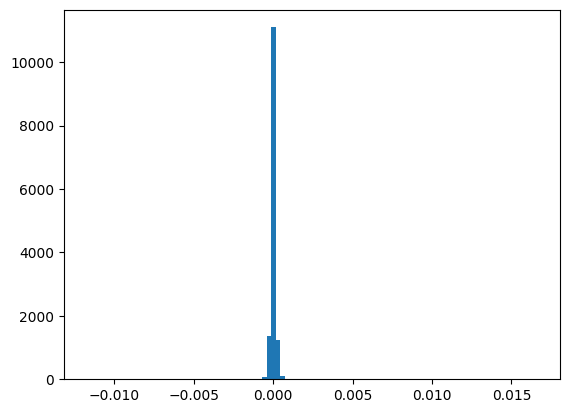

In [33]:
plt.hist(np.array(result)[:, -1], bins= 100)

(array([   4.,    4.,    5.,    4.,    4.,    5.,    5.,    9.,    7.,
           9.,   13.,   10.,   25.,   17.,   17.,   17.,   21.,   36.,
          34.,   39.,   36.,   38.,   32.,   44.,   43.,   48.,   59.,
          80.,   58.,   62.,   87.,   98.,  130.,  107.,  104.,  104.,
         125.,  168.,  160.,  212.,  240.,  236.,  264.,  339.,  357.,
         432.,  545., 1243., 1075.,  259., 1067.,  728.,  550.,  454.,
         385.,  330.,  283.,  281.,  267.,  223.,  221.,  190.,  199.,
         151.,  146.,  105.,  116.,   86.,   96.,   80.,   74.,   61.,
          54.,   52.,   55.,   42.,   41.,   41.,   28.,   26.,   28.,
          21.,   20.,   27.,   19.,   16.,   21.,   21.,    6.,   13.,
           9.,   20.,   18.,    6.,    9.,   10.,   11.,    9.,    3.,
           5.]),
 array([-4.96166412e-04, -4.86213788e-04, -4.76261165e-04, -4.66308541e-04,
        -4.56355917e-04, -4.46403293e-04, -4.36450669e-04, -4.26498045e-04,
        -4.16545421e-04, -4.06592797e-04, -3.96640

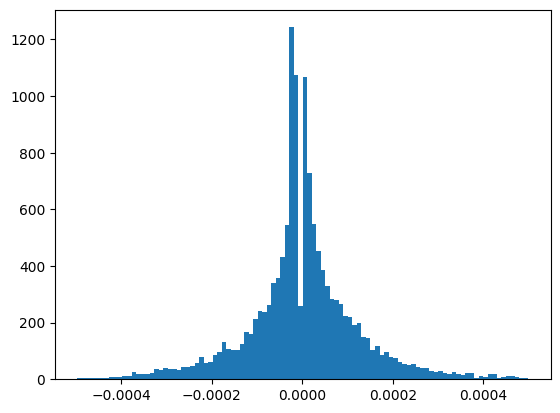

In [34]:
plt.hist([num for num in np.array(result)[:, -1] if -0.0005 <= num <= 0.0005], bins=100)

(array([2.423e+03, 0.000e+00, 1.460e+02, 0.000e+00, 9.800e+01, 0.000e+00,
        1.030e+02, 0.000e+00, 9.000e+01, 0.000e+00, 6.500e+01, 0.000e+00,
        4.700e+01, 0.000e+00, 2.800e+01, 0.000e+00, 5.000e+01, 0.000e+00,
        2.000e+01, 0.000e+00, 3.500e+01, 0.000e+00, 2.300e+01, 0.000e+00,
        3.000e+01, 0.000e+00, 2.000e+01, 0.000e+00, 1.500e+01, 0.000e+00,
        2.200e+01, 0.000e+00, 2.100e+01, 0.000e+00, 4.000e+00, 0.000e+00,
        1.000e+01, 0.000e+00, 2.100e+01, 0.000e+00, 1.100e+01, 0.000e+00,
        2.800e+01, 0.000e+00, 5.000e+00, 0.000e+00, 7.000e+00, 0.000e+00,
        7.000e+00, 0.000e+00, 0.000e+00, 1.700e+01, 0.000e+00, 7.000e+00,
        0.000e+00, 1.000e+01, 0.000e+00, 8.000e+00, 0.000e+00, 1.200e+01,
        0.000e+00, 8.000e+00, 0.000e+00, 9.000e+00, 0.000e+00, 4.000e+00,
        0.000e+00, 1.500e+01, 0.000e+00, 4.000e+00, 0.000e+00, 1.900e+01,
        0.000e+00, 3.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 4.000e+00,
        0.000e+00, 1.200e+01, 0.000e+0

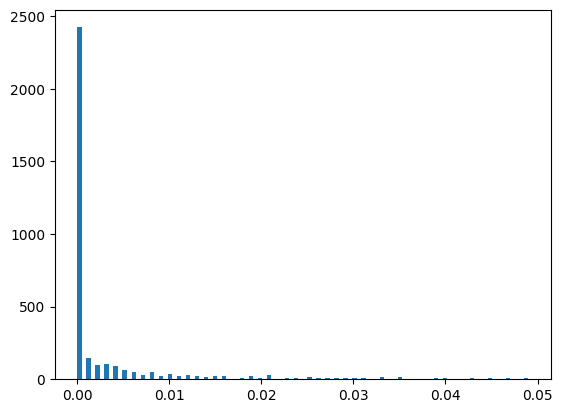

In [35]:
plt.hist([num for num in np.array(result)[:, 3] if num < 0.05], bins=100)

(array([ 259., 1919., 1232.,  896.,  741.,  582.,  524.,  445.,  384.,
         337.,  310.,  261.,  228.,  221.,  190.,  172.,  144.,  141.,
         118.,  124.,  121.,  101.,   96.,  104.,   74.,   92.,   81.,
          81.,   73.,   68.,   70.,   70.,   65.,   61.,   58.,   54.,
          55.,   48.,   55.,   49.,   51.,   42.,   41.,   34.,   38.,
          36.,   33.,   27.,   27.,   25.]),
 array([ 0.  ,  0.98,  1.96,  2.94,  3.92,  4.9 ,  5.88,  6.86,  7.84,
         8.82,  9.8 , 10.78, 11.76, 12.74, 13.72, 14.7 , 15.68, 16.66,
        17.64, 18.62, 19.6 , 20.58, 21.56, 22.54, 23.52, 24.5 , 25.48,
        26.46, 27.44, 28.42, 29.4 , 30.38, 31.36, 32.34, 33.32, 34.3 ,
        35.28, 36.26, 37.24, 38.22, 39.2 , 40.18, 41.16, 42.14, 43.12,
        44.1 , 45.08, 46.06, 47.04, 48.02, 49.  ]),
 <BarContainer object of 50 artists>)

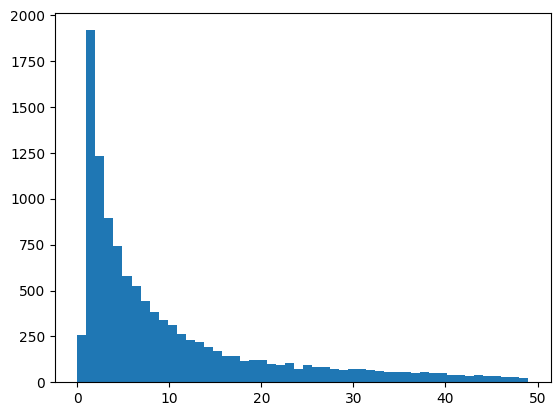

In [36]:
plt.hist([num for num in np.array(result)[:, 2] if num < 50], bins=50)

In [37]:
# 要多少时间才能达成一次网格交易
amplitude_threshold = 0.0005
durations = []
n = len(prices)

for i in range(n):
    start_time = float(prices[i]['t']) * 10**(-3)
    start_price = float(prices[i]['p']) 
    found_high = False
    found_low = False

    for j in range(i + 1, n):
        current_time = float(prices[j]['t']) * 10**(-3)
        current_price = float(prices[j]['p']) 

        price_change = ((current_price - start_price) / start_price) 

        if price_change >= amplitude_threshold:
            found_high = True
        if price_change <= -amplitude_threshold:
            found_low = True

        if found_high and found_low:
            durations.append({'start_time': start_time, 'duration': current_time - start_time})
            break

    if not (found_high and found_low):
        durations.append({'start_time': start_time, 'duration': None})


In [28]:
durations

[{'start_time': 1719232027.549, 'duration': 17.25},
 {'start_time': 1719232034.756, 'duration': 74.88199996948242},
 {'start_time': 1719232037.095, 'duration': 72.54299998283386},
 {'start_time': 1719232037.095, 'duration': 72.54699993133545},
 {'start_time': 1719232037.095, 'duration': 79.57699990272522},
 {'start_time': 1719232037.095, 'duration': 79.57699990272522},
 {'start_time': 1719232037.095, 'duration': 79.57699990272522},
 {'start_time': 1719232037.095, 'duration': 79.57699990272522},
 {'start_time': 1719232037.095, 'duration': 79.57699990272522},
 {'start_time': 1719232037.095, 'duration': 79.57699990272522},
 {'start_time': 1719232037.095, 'duration': 79.57699990272522},
 {'start_time': 1719232037.579, 'duration': 72.05900001525879},
 {'start_time': 1719232037.7, 'duration': 71.93799996376038},
 {'start_time': 1719232037.931, 'duration': 71.70700001716614},
 {'start_time': 1719232037.956, 'duration': 20.960999965667725},
 {'start_time': 1719232037.956, 'duration': 20.963000

In [29]:
with open('result.json', 'w') as file:
    json.dump(durations, file, indent=4)


In [30]:
# 单边需要多少时间达到阈值
threshold = 0.002
durations = []
n = len(prices)

for i in range(n):
    start_time = float(prices[i]['t']) * 10**(-3)
    start_price = float(prices[i]['p']) 
    found = False

    for j in range(i + 1, n):
        current_time = float(prices[j]['t']) * 10**(-3)
        current_price = float(prices[j]['p']) 

        price_change = ((current_price - start_price) / start_price)

        if abs(price_change) >= threshold:
            durations.append({'start_time': start_time, 'duration': current_time - start_time})
            found = True
            break

    if not found:
        durations.append({'start_time': start_time, 'duration': None})



In [31]:
durations

[{'start_time': 1719232027.549, 'duration': None},
 {'start_time': 1719232034.756, 'duration': None},
 {'start_time': 1719232037.095, 'duration': None},
 {'start_time': 1719232037.095, 'duration': None},
 {'start_time': 1719232037.095, 'duration': None},
 {'start_time': 1719232037.095, 'duration': None},
 {'start_time': 1719232037.095, 'duration': None},
 {'start_time': 1719232037.095, 'duration': None},
 {'start_time': 1719232037.095, 'duration': None},
 {'start_time': 1719232037.095, 'duration': None},
 {'start_time': 1719232037.095, 'duration': None},
 {'start_time': 1719232037.579, 'duration': None},
 {'start_time': 1719232037.7, 'duration': None},
 {'start_time': 1719232037.931, 'duration': None},
 {'start_time': 1719232037.956, 'duration': None},
 {'start_time': 1719232037.956, 'duration': None},
 {'start_time': 1719232037.956, 'duration': None},
 {'start_time': 1719232039.754, 'duration': None},
 {'start_time': 1719232040.749, 'duration': None},
 {'start_time': 1719232043.482, '

In [32]:
threshold = 0.001
durations = []
n = len(prices)

for i in range(n):
    start_time = float(prices[i]['t']) * 10**(-3)
    start_price = float(prices[i]['p']) 
    found_up = False
    found_down = False

    up_duration = None
    down_duration = None

    for j in range(i + 1, n):
        current_time = float(prices[j]['t']) * 10**(-3)
        current_price = float(prices[j]['p']) 

        price_change = ((current_price - start_price) / start_price)

        if not found_up and price_change >= threshold:
            up_duration = current_time - start_time
            found_up = True

        if not found_down and price_change <= -threshold:
            down_duration = current_time - start_time
            found_down = True

        if found_up and found_down:
            break

    durations.append({'start_time': start_time, 'up_duration': up_duration, 'down_duration': down_duration})


In [40]:
with open('result.json', 'w') as file:
    json.dump(durations, file, indent=4)


In [38]:
# 不考虑回撤

# 定义阈值
initial_threshold = 0.0002  # 万分之一
final_threshold = 0.001  # 千分之二

# 存储结果的列表
durations = []

# 数据的长度
n = len(prices)

# 遍历每个起始点
for i in range(n):
    start_time = float(prices[i]['t']) * 10**(-3)
    start_price = float(prices[i]['p'])

    # 初始化标志和变量
    found_initial = False
    initial_time = None
    initial_price = None
    direction = None

    for j in range(i + 1, n):
        current_time = float(prices[j]['t']) * 10**(-3)
        current_price = float(prices[j]['p'])
        price_change = (current_price - start_price) / start_price

        if not found_initial:
            if price_change >= initial_threshold:
                found_initial = True
                initial_time = current_time
                initial_price = current_price
                direction = 'up'
            elif price_change <= -initial_threshold:
                found_initial = True
                initial_time = current_time
                initial_price = current_price
                direction = 'down'
        else:
            if direction == 'up':
                final_price_change = (current_price - initial_price) / initial_price
                if final_price_change >= final_threshold:
                    durations.append({'start_time': start_time, 'duration': current_time - initial_time, 'direction': direction})
                    break
                elif (current_price - start_price) / start_price <= initial_threshold:
                    # durations.append({'start_time': start_time, 'duration': None, 'direction': direction})
                    pass
                    break
            elif direction == 'down':
                final_price_change = (current_price - initial_price) / initial_price
                if final_price_change <= -final_threshold:
                    durations.append({'start_time': start_time, 'duration': current_time - initial_time, 'direction': direction})
                    break
                elif (current_price - start_price) / start_price >= initial_threshold:
                    # durations.append({'start_time': start_time, 'duration': None, 'direction': direction})
                    pass
                    break

    # 如果没有找到符合条件的最终结果，记录结果为 None
    if found_initial and j == n - 1:
        durations.append({'start_time': start_time, 'duration': None, 'direction': direction})


In [39]:
sum(1 for d in durations if d['duration'] is not None) / len(durations)

0.9820386169735069

In [36]:
# 考虑回撤

# 定义阈值
initial_threshold = 0.0005  # 万分之一
final_threshold = 0.001  # 千分之二

# 存储结果的列表
durations = []

# 数据的长度
n = len(prices)

# 遍历每个起始点
for i in range(n):
    start_time = float(prices[i]['t']) * 10**(-3)
    start_price = float(prices[i]['p'])

    # 初始化标志和变量
    found_initial = False
    initial_time = None
    initial_price = None
    direction = None

    for j in range(i + 1, n):
        current_time = float(prices[j]['t']) * 10**(-3)
        current_price = float(prices[j]['p'])
        price_change = (current_price - start_price) / start_price

        if not found_initial:
            if price_change >= initial_threshold:
                found_initial = True
                initial_time = current_time
                initial_price = current_price
                direction = 'up'
            elif price_change <= -initial_threshold:
                found_initial = True
                initial_time = current_time
                initial_price = current_price
                direction = 'down'
        else:
            if direction == 'up':
                final_price_change = (current_price - initial_price) / initial_price
                if final_price_change >= final_threshold:
                    durations.append({'start_time': start_time, 'duration': current_time - initial_time, 'direction': direction})
                    break
                elif (current_price - start_price) / start_price <= initial_threshold:
                    durations.append({'start_time': start_time, 'duration': None, 'direction': direction})
                    pass
                    break
            elif direction == 'down':
                final_price_change = (current_price - initial_price) / initial_price
                if final_price_change <= -final_threshold:
                    durations.append({'start_time': start_time, 'duration': current_time - initial_time, 'direction': direction})
                    break
                elif (current_price - start_price) / start_price >= initial_threshold:
                    durations.append({'start_time': start_time, 'duration': None, 'direction': direction})
                    pass
                    break

    # 如果没有找到符合条件的最终结果，记录结果为 None
    if found_initial and j == n - 1:
        durations.append({'start_time': start_time, 'duration': None, 'direction': direction})


In [37]:
sum(1 for d in durations if d['duration'] is not None) / len(durations)

0.18333333333333332

In [58]:
# 探究网格交易，但是不能单边过多
# 定义阈值

amplitude_threshold = 0.0005  # 万分之五
max_single_direction_threshold = 0.01  # 千分之八

# 存储结果的列表
durations = []

# 数据的长度
n = len(prices)

# 遍历每个起始点
for i in range(n):
    start_time = float(prices[i]['t']) * 10**(-3)
    start_price = float(prices[i]['p'])
    found_high = False
    found_low = False
    direction = None

    for j in range(i + 1, n):
        current_time = float(prices[j]['t']) * 10**(-3)
        current_price = float(prices[j]['p'])

        price_change = (current_price - start_price) / start_price

        if not found_high and not found_low:
            if price_change >= amplitude_threshold:
                found_high = True
                direction = 'up-down'
                high_price = current_price
            elif price_change <= -amplitude_threshold:
                found_low = True
                direction = 'down-up'
                low_price = current_price
        else:
            if found_high:
                if (current_price - high_price) / high_price >= max_single_direction_threshold:
                    break
                if price_change <= -amplitude_threshold:
                    found_low = True
                    durations.append({'start_time': start_time, 'duration': current_time - start_time, 'direction': direction})
                    break
            elif found_low:
                if (low_price - current_price) / low_price >= max_single_direction_threshold:
                    break
                if price_change >= amplitude_threshold:
                    found_high = True
                    durations.append({'start_time': start_time, 'duration': current_time - start_time, 'direction': direction})
                    break

    if not (found_high and found_low):
        durations.append({'start_time': start_time, 'duration': None, 'direction': direction})


In [59]:
sum(1 for d in durations if d['duration'] is not None) / len(durations)

0.7084785133565621

In [14]:
# 定义阈值
initial_threshold = 0.0005  # 万分之一
final_threshold = 0.001  # 千分之一

# 存储结果的列表
durations = []

# 数据的长度
n = len(prices)

# 遍历每个起始点
for i in range(n):
    start_time = float(prices[i]['t']) * 10**(-3)
    start_price = float(prices[i]['p'])

    # 初始化标志和变量
    found_initial = False
    initial_time = None
    initial_price = None
    direction = None
    initial_break_count = 0

    for j in range(i + 1, n):
        current_time = float(prices[j]['t']) * 10**(-3)
        current_price = float(prices[j]['p'])
        price_change = (current_price - start_price) / start_price

        if not found_initial:
            if price_change >= initial_threshold:
                found_initial = True
                initial_time = current_time
                initial_price = current_price
                direction = 'up'
            elif price_change <= -initial_threshold:
                found_initial = True
                initial_time = current_time
                initial_price = current_price
                direction = 'down'
        else:
            if direction == 'up':
                final_price_change = (current_price - initial_price) / initial_price
                if final_price_change >= final_threshold:
                    durations.append({'start_time': start_time, 'duration': current_time - initial_time, 'direction': direction, 'initial_break_count': initial_break_count})
                    break
                elif (current_price - start_price) / start_price <= -initial_threshold:
                    # 价格回撤到反方向的初始点，计数突破次数
                    initial_break_count += 1
                    # 找到回撤点并记录重新突破初始点的次数
                    while j < n:
                        current_time = float(prices[j]['t']) * 10**(-3)
                        current_price = float(prices[j]['p'])
                        price_change = (current_price - start_price) / start_price
                        if price_change >= initial_threshold:
                            break
                        j += 1
            elif direction == 'down':
                final_price_change = (current_price - initial_price) / initial_price
                if final_price_change <= -final_threshold:
                    durations.append({'start_time': start_time, 'duration': current_time - initial_time, 'direction': direction, 'initial_break_count': initial_break_count})
                    break
                elif (current_price - start_price) / start_price >= initial_threshold:
                    # 价格回撤到反方向的初始点，计数突破次数
                    initial_break_count += 1
                    # 找到回撤点并记录重新突破初始点的次数
                    while j < n:
                        current_time = float(prices[j]['t']) * 10**(-3)
                        current_price = float(prices[j]['p'])
                        price_change = (current_price - start_price) / start_price
                        if price_change <= -initial_threshold:
                            break
                        j += 1

    # 如果没有找到符合条件的最终结果，记录结果为 None
    if found_initial and j == n - 1:
        durations.append({'start_time': start_time, 'duration': None, 'direction': direction, 'initial_break_count': initial_break_count})



KeyboardInterrupt: 

In [13]:
with open('result.json', 'w') as file:
    json.dump(durations, file, indent=4)

In [17]:
durations

[{'start_time': 1719243468.4520001,
  'duration': 89.14499998092651,
  'direction': 'down',
  'initial_break_count': 0},
 {'start_time': 1719243469.654,
  'duration': 89.14499998092651,
  'direction': 'down',
  'initial_break_count': 0},
 {'start_time': 1719243470.7910001,
  'duration': 89.14499998092651,
  'direction': 'down',
  'initial_break_count': 0},
 {'start_time': 1719243473.282,
  'duration': 65.65299987792969,
  'direction': 'down',
  'initial_break_count': 0},
 {'start_time': 1719243473.282,
  'duration': 65.65299987792969,
  'direction': 'down',
  'initial_break_count': 0},
 {'start_time': 1719243473.282,
  'duration': 65.65299987792969,
  'direction': 'down',
  'initial_break_count': 0},
 {'start_time': 1719243473.282,
  'duration': 65.65299987792969,
  'direction': 'down',
  'initial_break_count': 0},
 {'start_time': 1719243473.282,
  'duration': 65.65299987792969,
  'direction': 'down',
  'initial_break_count': 0},
 {'start_time': 1719243475.516,
  'duration': 89.1449999

In [15]:
prices

[{'t': 1719556439244, 'p': '0.0122486'},
 {'t': 1719556439382, 'p': '0.0122486'},
 {'t': 1719556443091, 'p': '0.0122464'},
 {'t': 1719556443288, 'p': '0.0122464'},
 {'t': 1719556443400, 'p': '0.0122464'},
 {'t': 1719556448110, 'p': '0.0122482'},
 {'t': 1719556448117, 'p': '0.0122487'},
 {'t': 1719556448616, 'p': '0.0122489'},
 {'t': 1719556448733, 'p': '0.0122501'},
 {'t': 1719556449227, 'p': '0.0122512'},
 {'t': 1719556449424, 'p': '0.0122512'},
 {'t': 1719556449981, 'p': '0.0122521'},
 {'t': 1719556449981, 'p': '0.0122523'},
 {'t': 1719556450048, 'p': '0.0122526'},
 {'t': 1719556451208, 'p': '0.0122542'},
 {'t': 1719556451208, 'p': '0.0122544'},
 {'t': 1719556451208, 'p': '0.0122550'},
 {'t': 1719556451208, 'p': '0.0122553'},
 {'t': 1719556451208, 'p': '0.0122556'},
 {'t': 1719556451208, 'p': '0.0122559'},
 {'t': 1719556451208, 'p': '0.0122562'},
 {'t': 1719556451208, 'p': '0.0122568'},
 {'t': 1719556451208, 'p': '0.0122569'},
 {'t': 1719556451264, 'p': '0.0122587'},
 {'t': 171955645

In [32]:
durations = []
delta = 0.0005

for i in range(len(prices)):
    start_time = prices[i]['t'] / 10**3
    start_price = float(prices[i]['p'])
    up_target = start_price* (1 + delta)
    down_target = start_price * (1 - delta)

    up_reached = False
    down_reached = False
    up_time = None
    down_time = None

    # Iterate over subsequent prices to find when the price first reaches the target
    for j in range(i + 1, len(prices)):
        current_time = prices[j]['t'] / 10**3
        current_price = float(prices[j]['p'])

        if not up_reached and current_price >= up_target:
            up_reached = True
            up_time = current_time

        if not down_reached and current_price <= down_target:
            down_reached = True
            down_time = current_time

        # Check if we need to start timing for up or down target
        if up_reached or down_reached:
            break

    # Initialize time durations for up and down targets
    up_duration = None
    down_duration = None

    # Check subsequent prices for returning to the original price
    if up_reached or down_reached:
        for k in range(j + 1, len(prices)):
            return_time = prices[k]['t'] / 10**3
            return_price = float(prices[k]['p'])

            if up_reached and return_price <= start_price:
                up_duration = return_time - up_time
                break

            if down_reached and return_price >= start_price:
                down_duration = return_time - down_time
                break

    durations.append({
        'start_time': start_time,
        'start_price': start_price,
        'durations': up_duration or down_duration,
        'reached': up_reached or down_reached
    })


In [33]:
import numpy as np
np.sum([1 if x['reached'] and not x['durations'] else 0 for x in durations]) / len(durations)

0.1479147914791479

In [34]:
# 调试用
# prices = [1,2,3,4,5,6,7,6,5,4,3,2,1]
# prices = [{'t': x, 'p':x} for x in prices]

In [36]:
# 统计网格交易法中发生的最大回撤

durations = []
delta = 0.0008

for i in range(len(prices)):
    start_time = prices[i]['t'] / 10**3
    start_price = float(prices[i]['p'])
    up_target = start_price * (1 + delta)
    down_target = start_price * (1 - delta)

    up_reached = False
    down_reached = False
    up_time = None
    down_time = None

    max_drawdown = 0.0

    # Iterate over subsequent prices to find when the price first reaches the target
    for j in range(i + 1, len(prices)):
        current_time = prices[j]['t'] / 10**3
        current_price = float(prices[j]['p'])

        if not up_reached and current_price >= up_target:
            up_reached = True
            up_time = current_time

        if not down_reached and current_price <= down_target:
            down_reached = True
            down_time = current_time

        if up_reached or down_reached:
            break

    # Initialize time durations and monitor max drawdown during the return to start price
    up_duration = None
    down_duration = None
    entry_price = up_target if up_reached else down_target

    if up_reached or down_reached:
        for k in range(j + 1, len(prices)):
            return_time = prices[k]['t'] / 10**3
            return_price = float(prices[k]['p'])

            # Calculate drawdown
            if up_reached:
                # got 写的是 entry - return 
                drawdown = (return_price - entry_price) / entry_price
                max_drawdown = max(max_drawdown, drawdown)
                if return_price <= start_price:
                    up_duration = return_time - up_time
                    break

            if down_reached:
                drawdown = (entry_price - return_price) / entry_price
                max_drawdown = max(max_drawdown, drawdown)
                if return_price >= start_price:
                    down_duration = return_time - down_time
                    break

    durations.append({
        'start_time': start_time,
        'start_price': start_price,
        'duration': up_duration if up_reached else down_duration,
        'reached': up_reached or down_reached,
        'max_drawdown': max_drawdown
    })


In [37]:
durations

[{'start_time': 1719580192.18,
  'start_price': 0.0121705,
  'duration': 7.21399998664856,
  'reached': True,
  'max_drawdown': 0.0002022620841743676},
 {'start_time': 1719580192.18,
  'start_price': 0.0121704,
  'duration': 7.21399998664856,
  'reached': True,
  'max_drawdown': 0.0002104804028992442},
 {'start_time': 1719580192.18,
  'start_price': 0.0121703,
  'duration': 7.24399995803833,
  'reached': True,
  'max_drawdown': 0.00021869885667929703},
 {'start_time': 1719580192.186,
  'start_price': 0.01217,
  'duration': 7.24399995803833,
  'reached': True,
  'max_drawdown': 0.00024335502838480224},
 {'start_time': 1719580192.316,
  'start_price': 0.0121701,
  'duration': 7.24399995803833,
  'reached': True,
  'max_drawdown': 0.00023513616941881794},
 {'start_time': 1719580194.679,
  'start_price': 0.0121706,
  'duration': 7.21399998664856,
  'reached': True,
  'max_drawdown': 0.00019404390050148062},
 {'start_time': 1719580194.679,
  'start_price': 0.0121698,
  'duration': 7.2439999

In [21]:
import numpy as np
np.sum([1 if x['reached'] and not x['duration'] else 0 for x in durations]) / len(durations)

0.22642264226422643

In [19]:
len([d for d in durations if d['max_drawdown'] > 0.001])

0

(array([3064., 1119.,  735.,  473.,  426.,  440.,  416.,  404.,  336.,
         174.,  160.,  165.,  141.,   39.,   62.,   93.,   53.,   79.,
          65.,   52.,  135.,   39.,   64.,  152.,   49.,  137.,   69.,
          26.,   48.,   35.,   26.,   32.,   18.,   28.,   16.,    7.,
          45.,   46.,   34.,   23.,   90.,   74.,   81.,   21.,   20.,
          49.,   44.,   27.,   35.,   33.]),
 array([0.        , 0.00050892, 0.00101784, 0.00152676, 0.00203568,
        0.0025446 , 0.00305352, 0.00356244, 0.00407136, 0.00458028,
        0.0050892 , 0.00559812, 0.00610704, 0.00661596, 0.00712488,
        0.0076338 , 0.00814272, 0.00865164, 0.00916056, 0.00966949,
        0.01017841, 0.01068733, 0.01119625, 0.01170517, 0.01221409,
        0.01272301, 0.01323193, 0.01374085, 0.01424977, 0.01475869,
        0.01526761, 0.01577653, 0.01628545, 0.01679437, 0.01730329,
        0.01781221, 0.01832113, 0.01883005, 0.01933897, 0.01984789,
        0.02035681, 0.02086573, 0.02137465, 0.02188357, 

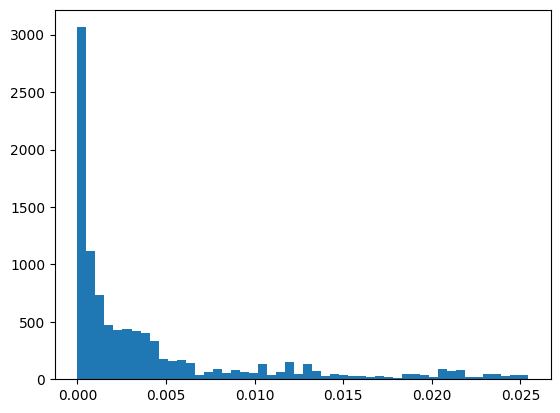

In [38]:
plt.hist([d['max_drawdown'] for d in durations], bins=50)